### **PREDICCIÓN DE CONVERSIÓN EN CAMPAÑAS DE MARKETING DIGITAL CON MACHINE LEARNING**
### **Introducción del Proyecto**

**Tema del Proyecto:**  
El proyecto busca resolver un problema crucial en marketing digital: identificar qué usuarios tienen mayor probabilidad de conversión en campañas publicitarias. Utilizaremos un enfoque de Machine Learning para analizar un dataset que incluye 8000 registros y 20 variables relacionadas con clientes, campañas y comportamiento digital. Este modelo ayudará a optimizar decisiones estratégicas y mejorar el retorno de inversión.

---

**Dataset:**  
[Predict Conversion in Digital Marketing](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data)  
- **Registros:** 8000 (sin valores nulos).  
- **Columnas:** 20.  

---

**Variables principales:** 

#### **Demográficas:**  
- `Age`: Edad del cliente, una variable numérica que puede influir en los patrones de compra y conversión.  
- `Gender`: Género del cliente (`Male`, `Female`), relevante para segmentación de campañas.  
- `Income`: Ingresos anuales del cliente, en $, indicando su capacidad adquisitiva y preferencia por ciertos productos o servicios.  

#### **Campañas publicitarias:**  
- `CampaignChannel`: Canal de distribución de la campaña (`Social Media`, `Email`, `PPC`, `Referral`, `SEO`), proporcionando información sobre dónde se alcanzaron los clientes.  
- `CampaignType`: Tipo de campaña (`Awareness`, `Retention`, `Conversion`, `Consideration`), reflejando el propósito estratégico de la acción publicitaria.  
- `AdSpend`: Cantidad de dinero $ gastada en publicidad para cada cliente o segmento (valor continuo).  

#### **Interacciones digitales:**  
- `ClickThroughRate`: Porcentaje de clics que los clientes realizaron sobre los anuncios mostrados, un indicador de interés.  
- `ConversionRate`: Porcentaje de usuarios que completaron una acción específica tras interactuar con los anuncios.  
- `WebsiteVisits`: Número de visitas al sitio web, representando el nivel de interés generado.  
- `PagesPerVisit`: Número promedio de páginas vistas por visita al sitio, reflejando el grado de compromiso del usuario.  
- `TimeOnSite`: Tiempo promedio (en minutos) que los usuarios permanecieron en el sitio web, un indicador del interés y la exploración de contenido.  
- `SocialShares`: Cantidad de veces que los usuarios compartieron contenido de la campaña en redes sociales, indicando viralidad e impacto orgánico.  
- `EmailOpens`: Número de correos electrónicos abiertos por los usuarios, mostrando efectividad de las campañas de email marketing.  
- `EmailClicks`: Número de clics realizados dentro de correos electrónicos, reflejando el nivel de interés en los enlaces promocionados.  

#### **Historial del cliente:**  
- `PreviousPurchases`: Número de compras anteriores realizadas por el cliente, útil para identificar patrones de lealtad.  
- `LoyaltyPoints`: Puntos acumulados en programas de fidelización, un reflejo del compromiso del cliente con la marca.  

#### **Plataformas y herramientas:**  
- `AdvertisingPlatform`: Valor único en todo el dataset (`IsConfid`), descartado por falta de variabilidad.  
- `AdvertisingTool`: Valor único en todo el dataset (`ToolConfid`), descartado por falta de información relevante.  

#### **Target:**  
- **`Conversion`:** Variable objetivo binaria:  
  - `1`: El cliente realizó la conversión.  
  - `0`: El cliente no realizó la conversión.  

**Metrica: Recall**
---

**Datos clave del dataset:**  
- **ConversionRate promedio:** Aproximadamente el 10%, lo que destaca la necesidad de segmentar audiencias y optimizar campañas para mejorar esta métrica.  

---

**Objetivo:**  
Desarrollar un modelo de clasificación binaria para predecir la probabilidad de conversión de cada cliente. Este modelo permitirá optimizar recursos publicitarios y diseñar estrategias más efectivas, priorizando canales y audiencias de mayor impacto.

---

**Metodología:**  
1. **Exploración inicial de datos (EDA):**  
   - Limpieza de valores irrelevantes (`AdvertisingPlatform`, `AdvertisingTool`).  
   - Identificación de tendencias clave en las tasas de conversión y comportamientos digitales.  

2. **Prueba de Modelos:**  
   - Algoritmos como Random Forest, XGBoost y regresión logística serán evaluados.  
   - Métricas clave: ROC-AUC, F1-Score y precisión.  

3. **Optimización:**  
   - Feature engineering para transformar y generar variables adicionales.  
   - Selección del modelo final con el mejor balance entre precisión y sensibilidad.  

---

**Impacto esperado:**  
- **Ahorro en costos:** Priorizar clientes con mayor probabilidad de conversión reducirá el gasto en campañas ineficientes.  
- **Mejora del ROI:** Identificar los canales y campañas más efectivos permitirá maximizar la rentabilidad de las inversiones.  
- **Toma de decisiones basada en datos:** El modelo guiará estrategias comerciales y publicitarias más informadas.

---

**Siguientes pasos:**  
- Completar el análisis exploratorio y visualización de datos.  
- Entrenar y evaluar modelos para seleccionar el más robusto.  
- Presentar resultados y recomendaciones en términos de impacto comercial y viabilidad técnica.  


### **INSTALL**

In [1]:
#!pip install imbalanced-learn
#!pip install shap

### **IMPORTS**

In [2]:
# === Standard Libraries ===
import re  # Para trabajar con expresiones regulares
import math
import warnings

# === Data Manipulation and Analysis ===
import pandas as pd  # Manejo y análisis de datos
import numpy as np  # Operaciones numéricas y manejo de arrays

# === Visualization ===
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos estadísticos y estilos
sns.set_style('whitegrid')  # Estilo de gráficos para seaborn

# === Model Selection and Preprocessing ===
from sklearn.model_selection import (
    train_test_split,  # Dividir datos en entrenamiento y prueba
    GridSearchCV,  # Búsqueda de hiperparámetros con validación cruzada
    StratifiedKFold,  # Validación cruzada estratificada
)
from sklearn.preprocessing import StandardScaler  # Escalado de características

# === Pipeline ===
from sklearn.pipeline import Pipeline  # Construcción de pipelines para preprocesamiento y modelos

# === Class Imbalance Handling ===
from imblearn.combine import SMOTETomek  # Combinación de SMOTE y Tomek Links para balancear datos

# === Machine Learning Models ===
from sklearn.ensemble import (
    RandomForestClassifier,  # Clasificador Random Forest
    GradientBoostingClassifier,  # Clasificador Gradient Boosting
    StackingClassifier,  # Clasificador basado en apilamiento
    RandomForestRegressor,  # Regresor Random Forest
    GradientBoostingRegressor,  # Regresor Gradient Boosting
)
from xgboost import XGBClassifier, XGBRegressor  # Clasificador y regresor XGBoost

# === Metrics and Evaluation ===
from sklearn.metrics import (
    classification_report,  # Generar reporte de métricas
    confusion_matrix,  # Matriz de confusión
    roc_auc_score,  # AUC-ROC
    f1_score,  # F1-Score
    recall_score,  # Recall
    precision_score,  # Precision
    mean_absolute_error,  # MAE para regresión
    mean_squared_error,  # MSE para regresión
)

# === Utilities ===
from sklearn.utils.class_weight import compute_class_weight  # Cálculo de pesos por clase
import joblib  # Guardar y cargar modelos entrenados

### **CONFIGURACIONES**

In [3]:
# Mostrar todas las columnas de un DataFrame
pd.set_option('display.max_columns', None)

# Ignorar FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **CARGA DE DATOS Y PRIMERAS EXPLORACIONES**

In [4]:
# Cargar los datos
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

In [5]:
# Exportar el DataFrame a un archivo Excel
#df.to_excel('digital_marketing_campaign_dataset.xlsx', index=False)

In [6]:
df.head(100)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8095,42,Female,134479,PPC,Conversion,1772.907833,0.098736,0.152312,40,4.783479,5.087264,76,18,5,8,72,IsConfid,ToolConfid,1
96,8096,62,Female,77429,Referral,Awareness,7909.335039,0.055027,0.160091,0,4.022981,5.796379,52,11,0,3,3482,IsConfid,ToolConfid,1
97,8097,58,Male,23134,SEO,Retention,5091.776674,0.190800,0.030221,24,9.938338,1.303695,13,8,7,4,205,IsConfid,ToolConfid,1
98,8098,46,Female,130995,PPC,Conversion,5175.874779,0.180008,0.100499,15,7.901173,11.429444,9,5,0,4,2595,IsConfid,ToolConfid,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [8]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [9]:
# Iterar por cada columna y obtener los valores únicos
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar los valores únicos de cada columna
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {values}")
    print("-" * 50)

Columna: CustomerID
Valores únicos: [ 8000  8001  8002 ... 15997 15998 15999]
--------------------------------------------------
Columna: Age
Valores únicos: [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
--------------------------------------------------
Columna: Gender
Valores únicos: ['Female' 'Male']
--------------------------------------------------
Columna: Income
Valores únicos: [136912  41760  88456 ...  24849 125471 107862]
--------------------------------------------------
Columna: CampaignChannel
Valores únicos: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
--------------------------------------------------
Columna: CampaignType
Valores únicos: ['Awareness' 'Retention' 'Conversion' 'Consideration']
--------------------------------------------------
Columna: AdSpend
Valores únicos: [6497.87006842 3898.66860568 1546.4295958  ... 4609.53463542 9476.10635405
 7743.6

In [10]:
# Iterar por cada columna y mostrar los value_counts
for col in df.columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("-" * 50)


Columna: CustomerID
CustomerID
8000     1
13329    1
13342    1
13341    1
13340    1
        ..
10661    1
10660    1
10659    1
10658    1
15999    1
Name: count, Length: 8000, dtype: int64
--------------------------------------------------
Columna: Age
Age
64    187
62    182
43    178
66    178
34    177
49    173
45    173
52    172
40    170
42    167
46    165
39    165
25    162
38    162
21    160
54    160
30    157
32    157
57    157
37    156
35    155
51    155
68    155
23    154
28    153
36    153
20    151
41    151
47    150
61    150
19    150
53    149
50    149
18    148
29    148
31    148
33    148
56    147
69    147
59    146
58    144
26    143
55    143
63    140
22    139
60    139
67    137
65    137
27    136
24    129
44    128
48    120
Name: count, dtype: int64
--------------------------------------------------
Columna: Gender
Gender
Female    4839
Male      3161
Name: count, dtype: int64
--------------------------------------------------
Columna: Inco

### **LIMPIEZA DE DATOS**

In [11]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'])

In [12]:
# Identificar duplicados
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Mostrar filas duplicadas
if duplicados.sum() > 0:
    print("Filas duplicadas:")
    print(df[duplicados])

# Eliminar duplicados si SE encuentran
df = df.drop_duplicates()

# Verificar que se eliminaron los duplicados
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")


Número de filas duplicadas: 0
Número de filas después de eliminar duplicados: 8000


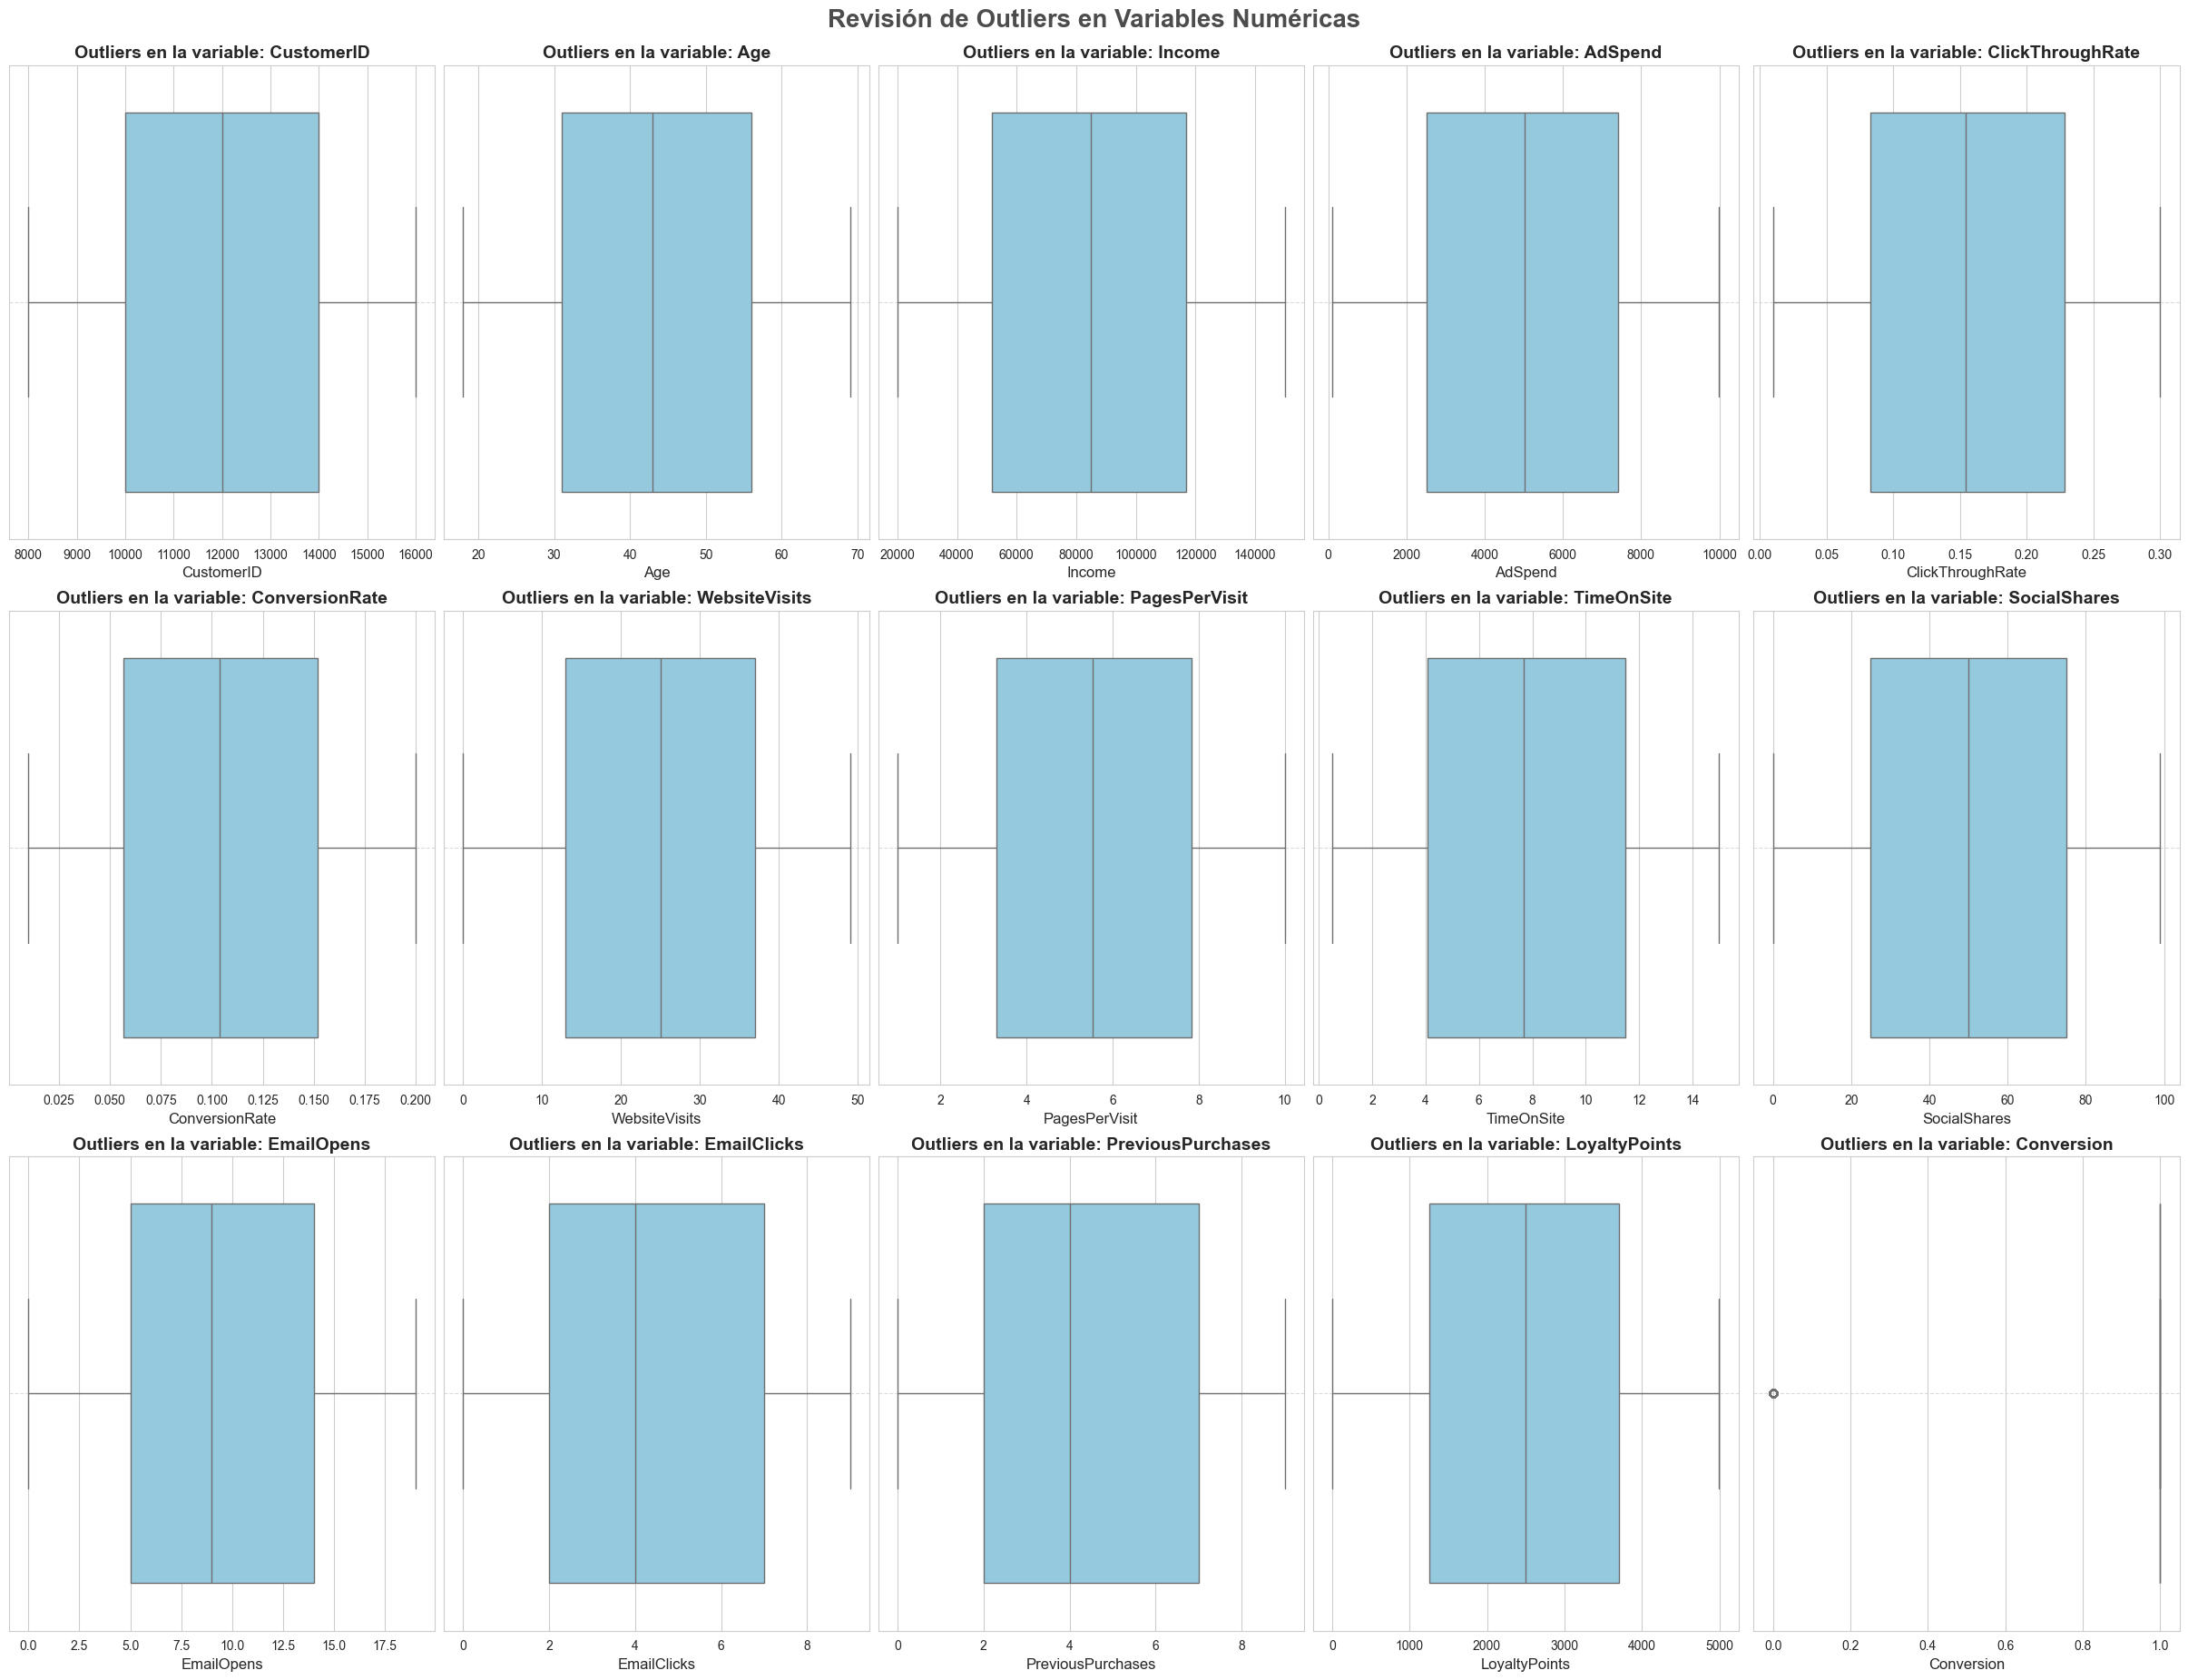

In [13]:
# Filtrar las variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Número de columnas por fila
columns_per_row = 5

# Número total de variables numéricas
total_variables = len(variables_numericas)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Crear boxplots
for i, var in enumerate(variables_numericas):
    sns.boxplot(data=df, x=var, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Outliers en la variable: {var}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Revisión de Outliers en Variables Numéricas', fontsize=20, fontweight='bold', color="#4c4c4c", y=1.02)

plt.show()



### **EDA**

C:\Users\mikel\AppData\Local\Temp\ipykernel_22720\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
C:\Users\mikel\AppData\Local\Temp\ipykernel_22720\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
C:\Users\mikel\AppData\Local\Temp\ipykernel_22720\3551082037.py:31: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)


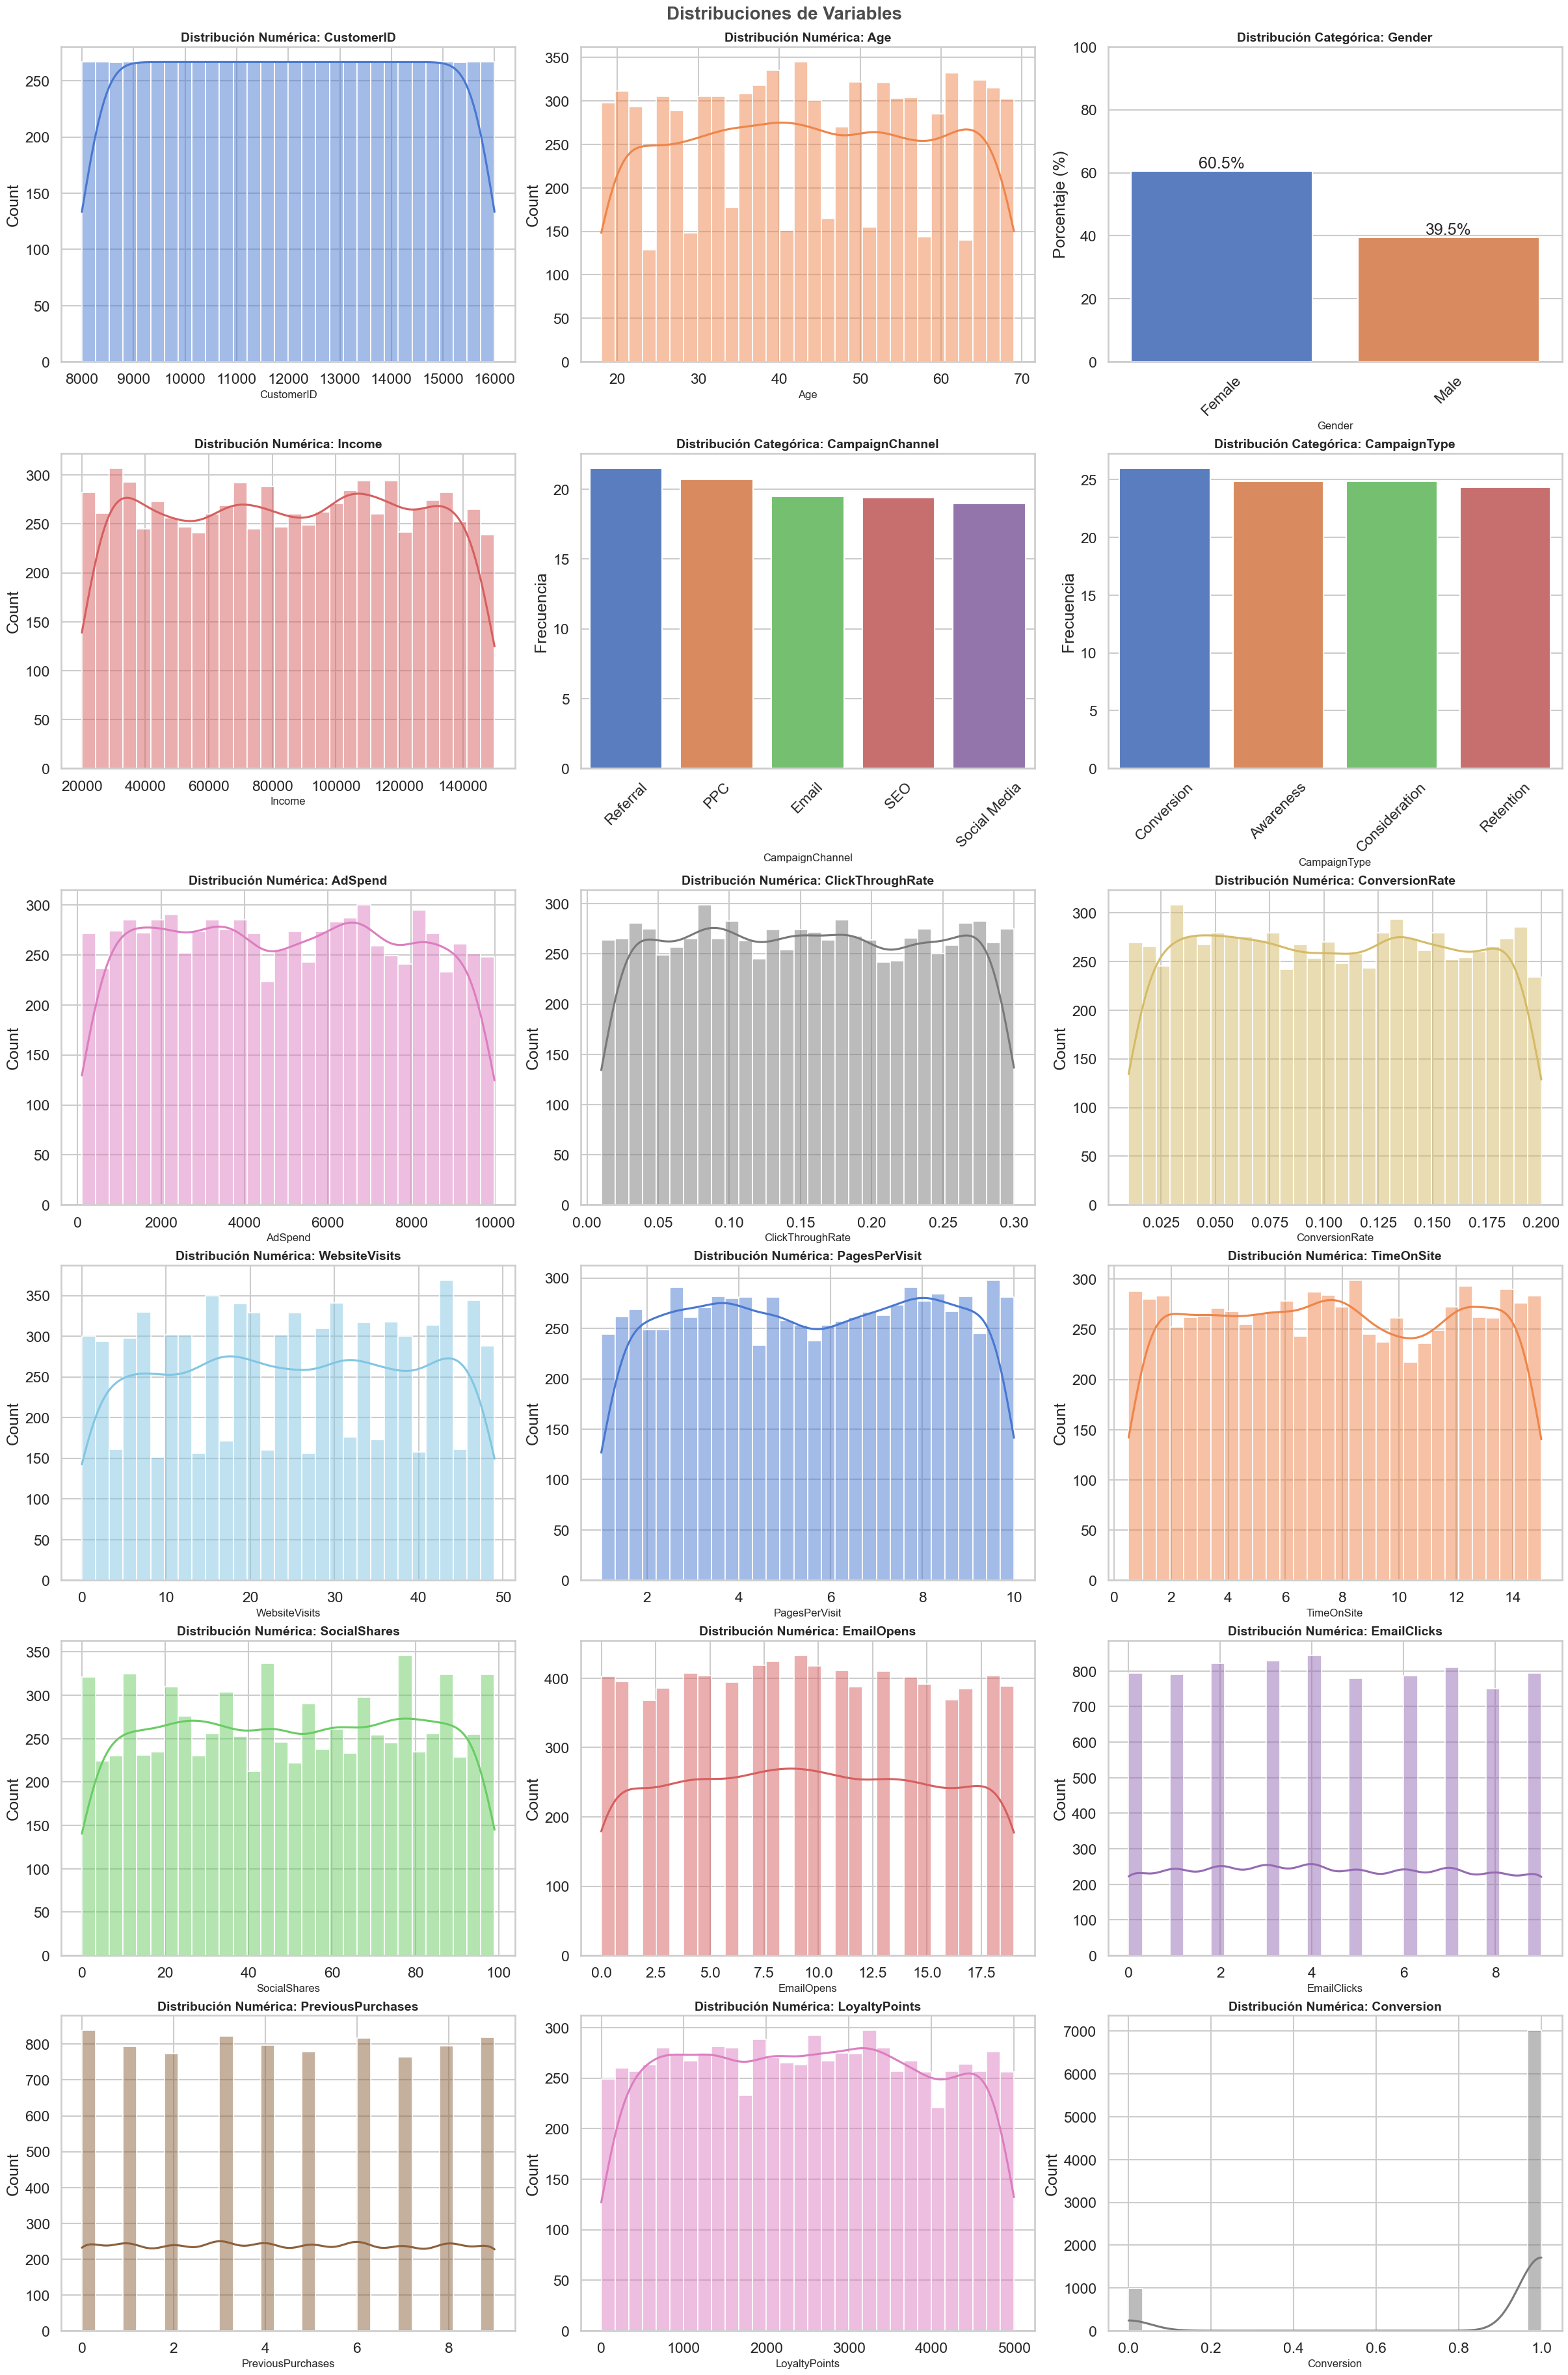

In [20]:
# Configuración general
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Número de columnas por fila
columns_per_row = 3

# Número total de columnas
total_columns = len(df.columns)

# Número de filas necesarias
rows = math.ceil(total_columns / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Colores personalizados
palette = sns.color_palette("muted")

# Visualizar cada columna
for i, column in enumerate(df.columns):
    ax = axes[i]
    if df[column].dtype in ['int64', 'float64']:
        # Variables numéricas
        sns.histplot(df[column], kde=True, bins=30, ax=ax, color=palette[i % len(palette)])
        ax.set_title(f'Distribución Numérica: {column}', fontsize=14, fontweight='bold')
    elif df[column].dtype == 'object' or df[column].dtype == 'bool':
        # Variables categóricas
        value_counts = df[column].value_counts(normalize=True) * 100  # Porcentajes
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette=palette)
        ax.set_title(f'Distribución Categórica: {column}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Porcentaje (%)' if column == "Gender" else 'Frecuencia')
        ax.set_ylim(0, 100 if column == "Gender" else None)
        
        # Agregar etiquetas de porcentaje solo para 'Gender'
        if column == "Gender":
            for container in ax.containers:
                ax.bar_label(container, fmt='%.1f%%')
        
        ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column, fontsize=12)

# Ajustar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Distribuciones de Variables', fontsize=20, fontweight='bold', color="#4c4c4c", y=1.01)

plt.show()

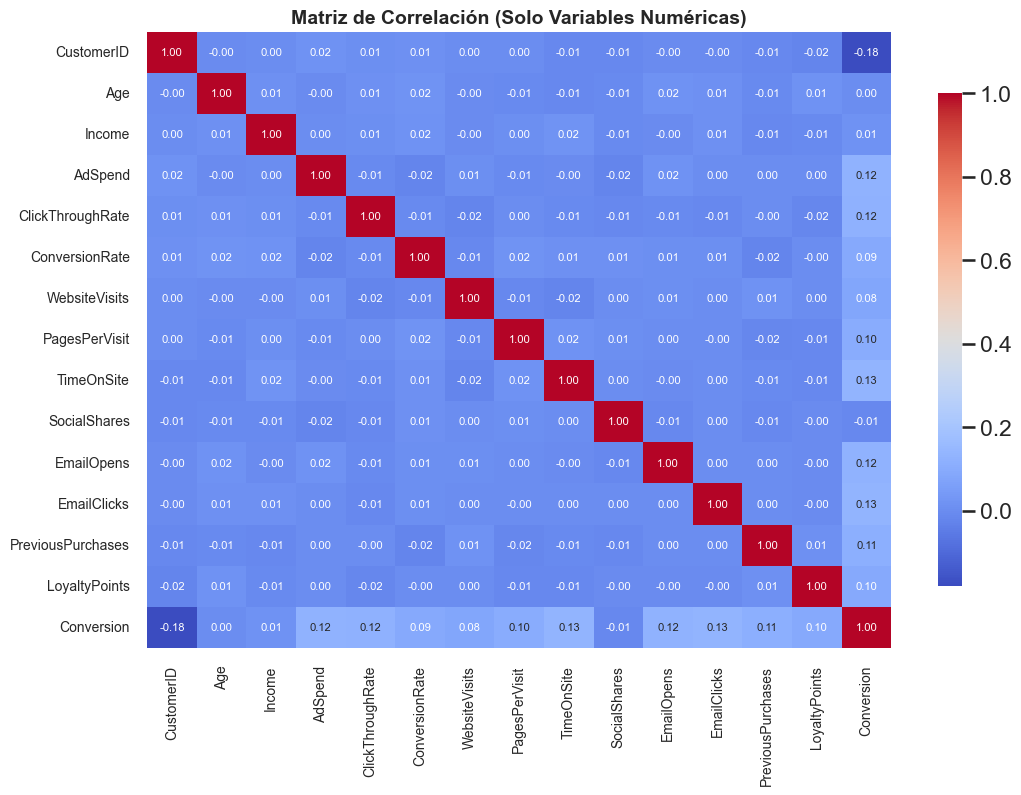

In [126]:
# Seleccionar solo columnas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mapa de calor con texto y números más pequeños
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8},  # Tamaño del texto en los números
    cbar_kws={"shrink": 0.8}  # Reducir la barra de color
)
plt.title('Matriz de Correlación (Solo Variables Numéricas)', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

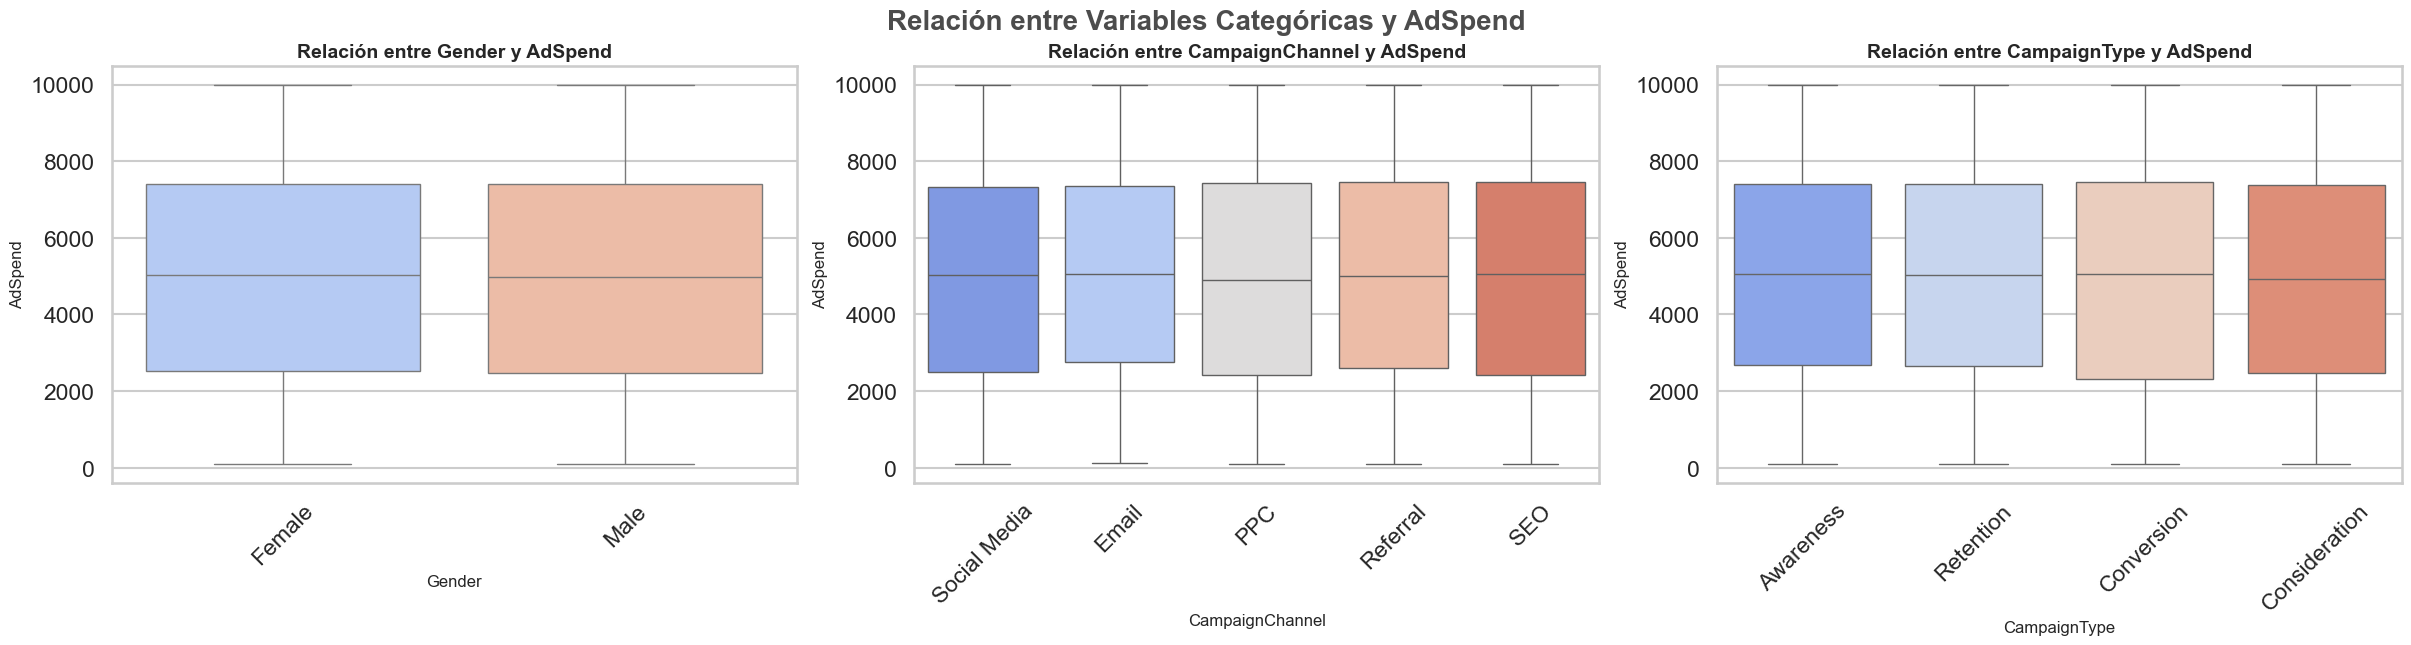

In [127]:
# Variables categóricas a explorar
categorical_vars = ['Gender', 'CampaignChannel', 'CampaignType']

# Variable numérica a analizar
numeric_var = 'AdSpend'

# Número de gráficos por fila
columns_per_row = 3

# Número total de variables categóricas
total_variables = len(categorical_vars)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Generar boxplots
for i, cat_var in enumerate(categorical_vars):
    sns.boxplot(data=df, x=cat_var, y=numeric_var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Relación entre {cat_var} y {numeric_var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel(numeric_var, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Relación entre Variables Categóricas y AdSpend', fontsize=20, fontweight='bold', color='#4c4c4c', y=1.05)

plt.show()



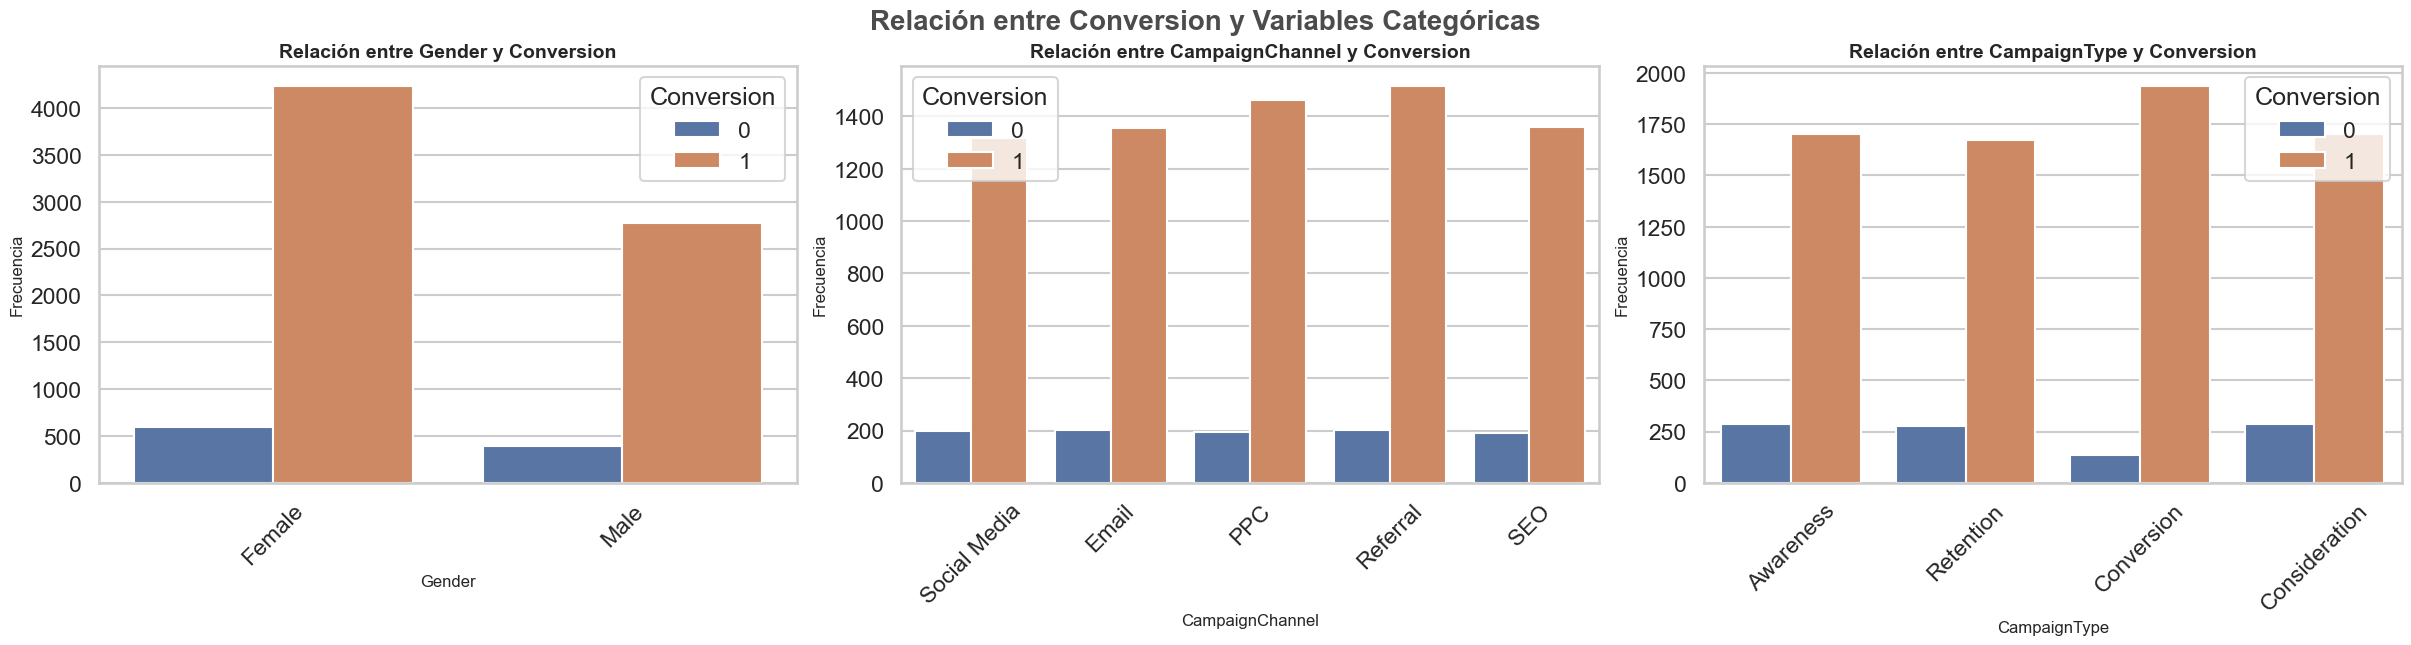

In [109]:
# Variables categóricas a explorar
categorical_vars = ['Gender', 'CampaignChannel', 'CampaignType']

# Número de gráficos por fila
columns_per_row = 3

# Número total de variables categóricas
total_variables = len(categorical_vars)

# Número de filas necesarias
rows = math.ceil(total_variables / columns_per_row)

# Crear subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(24, rows * 6), constrained_layout=True)
axes = axes.flatten()

# Generar countplots
for i, cat_var in enumerate(categorical_vars):
    sns.countplot(data=df, x=cat_var, hue='Conversion', ax=axes[i])
    axes[i].set_title(f'Relación entre {cat_var} y Conversion', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Relación entre Conversion y Variables Categóricas', fontsize=20, fontweight='bold', color='#4c4c4c', y=1.05)

plt.show()



In [84]:
# Columnas categóricas a codificar
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [85]:
# Verificar las nuevas columnas codificadas
df_encoded.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Gender_Female,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1,True,False,False,False,False,False,True,True,False,False,False
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1,False,True,True,False,False,False,False,False,False,False,True
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1,True,False,False,True,False,False,False,True,False,False,False
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1,True,False,False,True,False,False,False,False,False,True,False
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1,True,False,False,True,False,False,False,False,False,True,False


In [86]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    8000 non-null   int64  
 1   Age                           8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

In [87]:
df_encoded.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


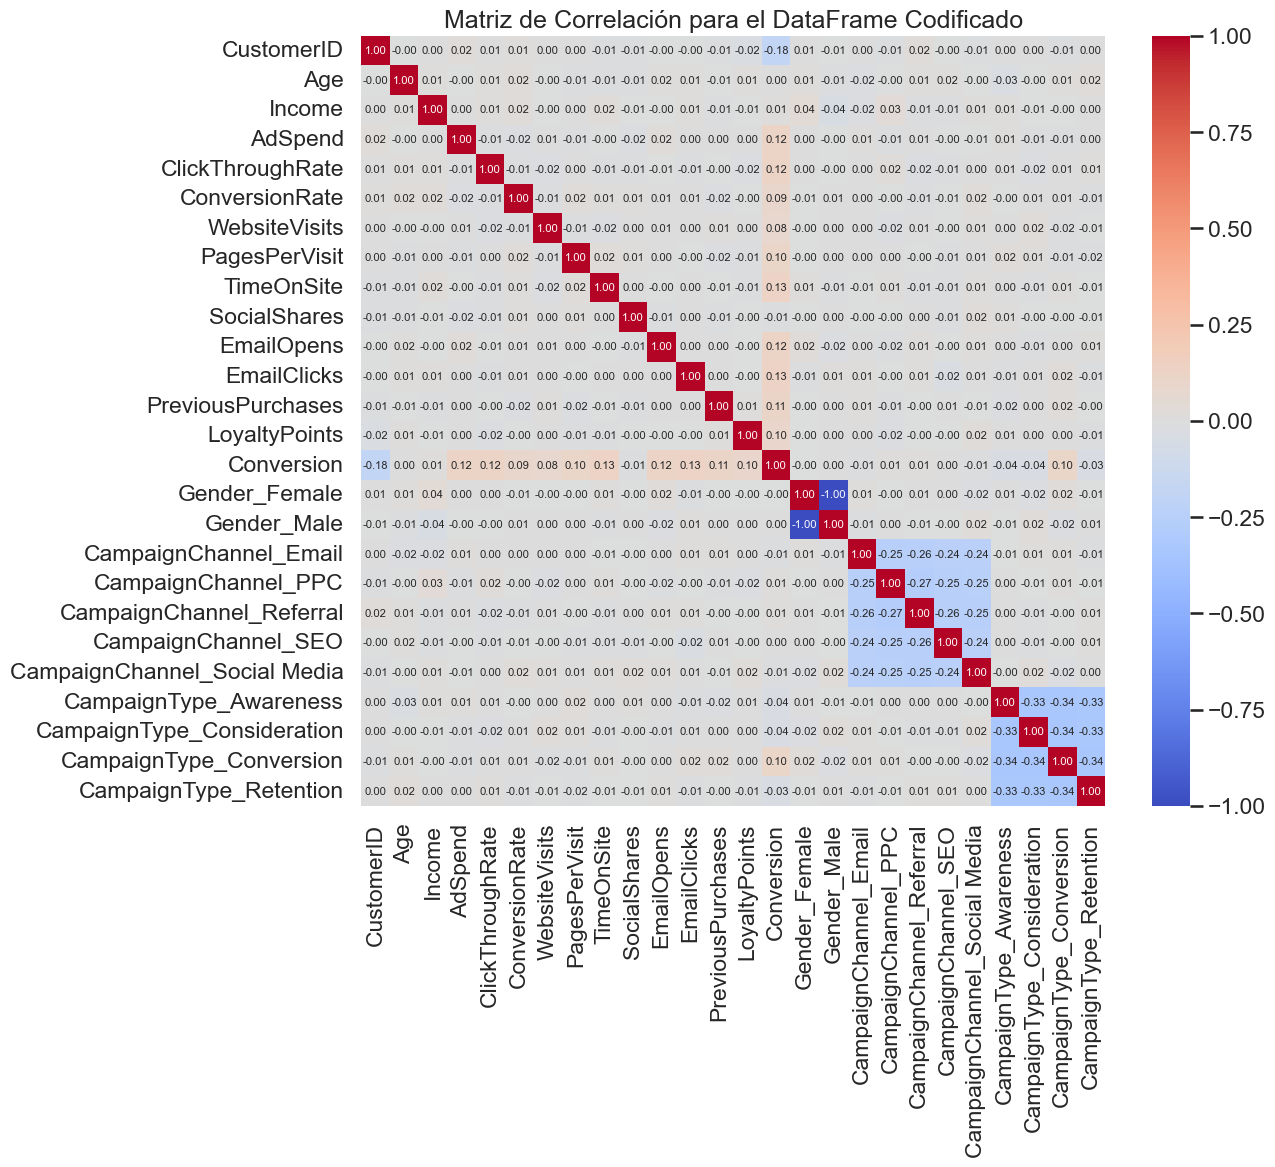

In [101]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con números
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Matriz de Correlación para el DataFrame Codificado')
plt.show()



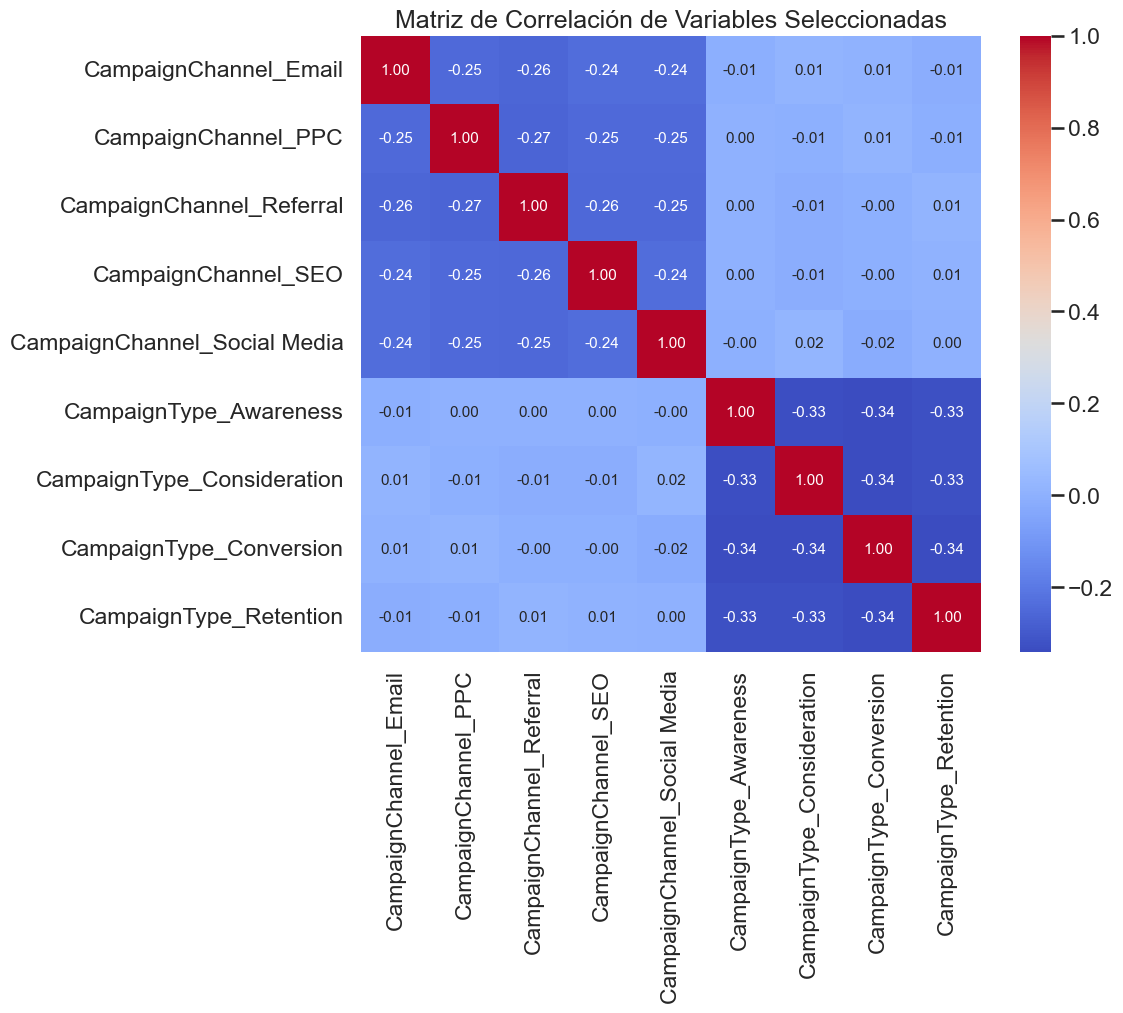

In [96]:
# Seleccionar las columnas específicas
selected_columns = [
    'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral',
    'CampaignChannel_SEO', 'CampaignChannel_Social Media',
    'CampaignType_Awareness', 'CampaignType_Consideration',
    'CampaignType_Conversion', 'CampaignType_Retention'
]

# Filtrar el DataFrame para incluir solo estas columnas
filtered_df = df_encoded[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = filtered_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 11})
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


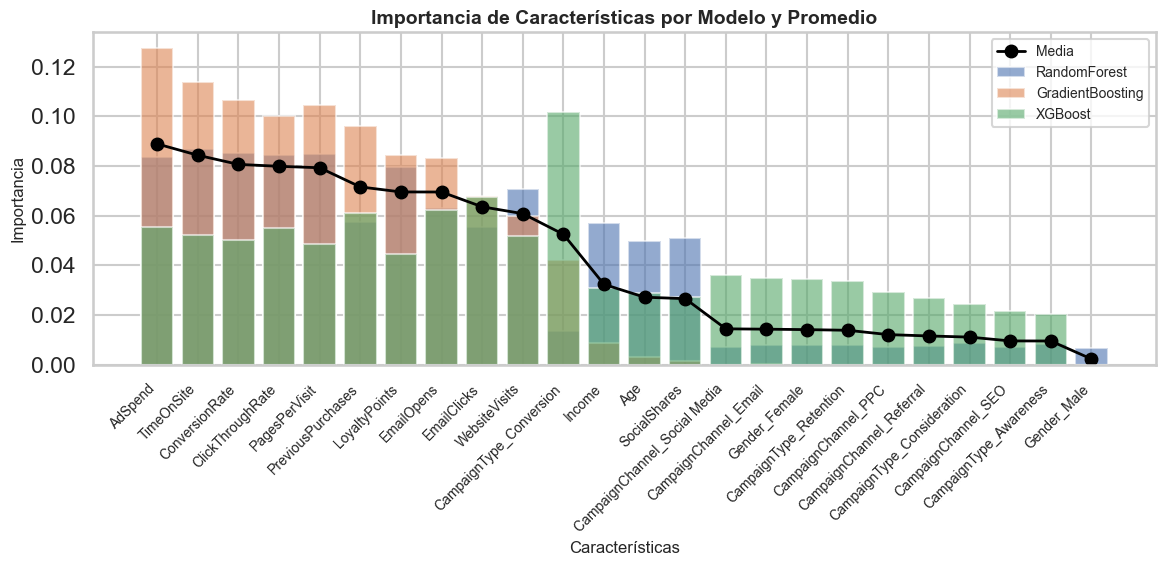

C:\Users\mikel\AppData\Local\Temp\ipykernel_292\1584932466.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


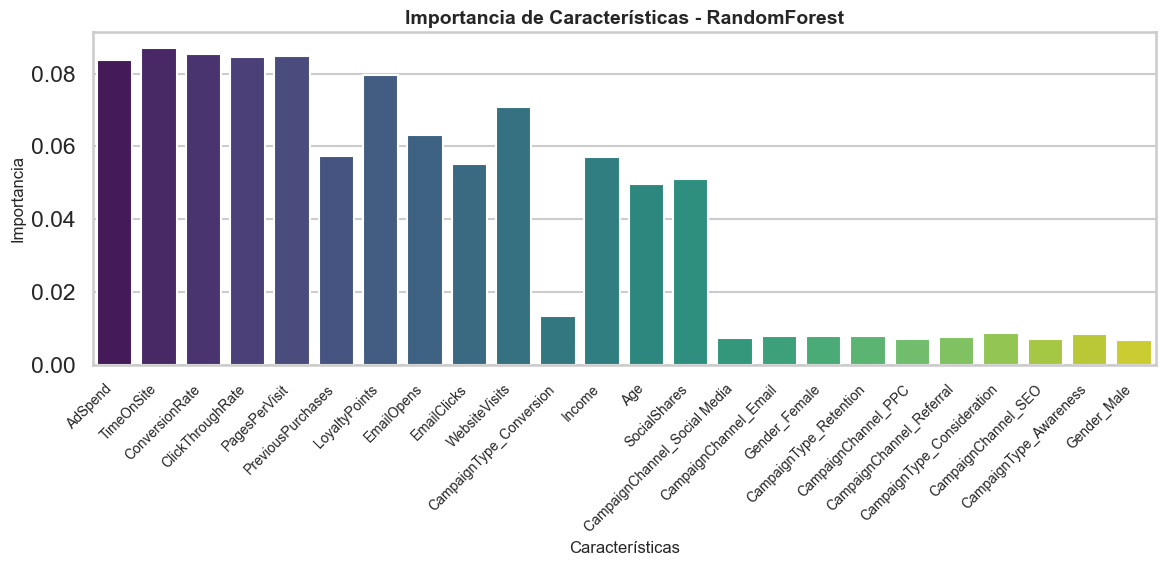

C:\Users\mikel\AppData\Local\Temp\ipykernel_292\1584932466.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


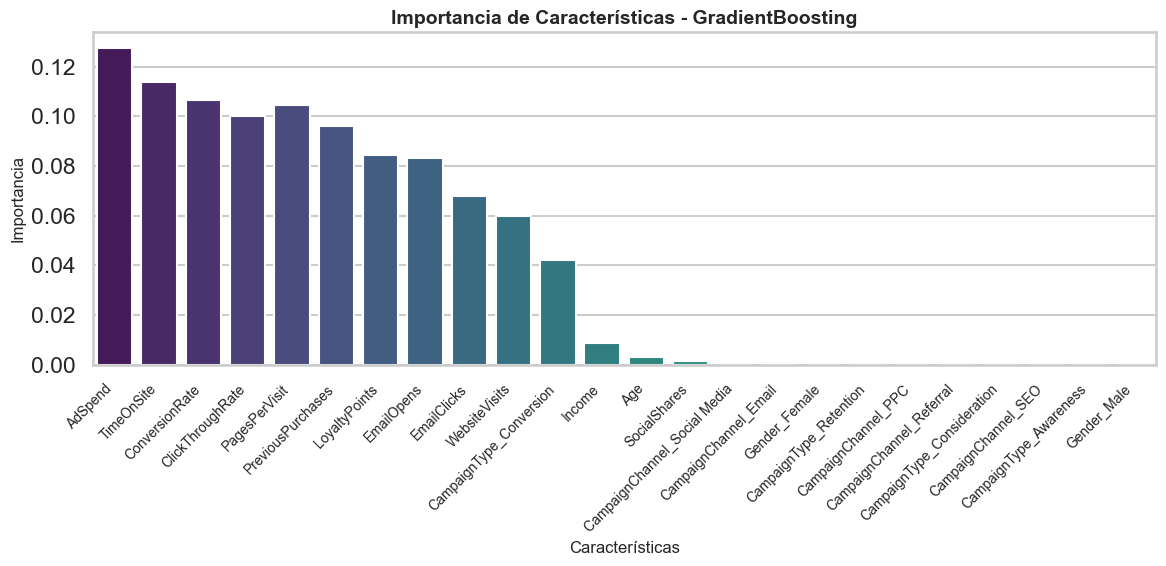

C:\Users\mikel\AppData\Local\Temp\ipykernel_292\1584932466.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


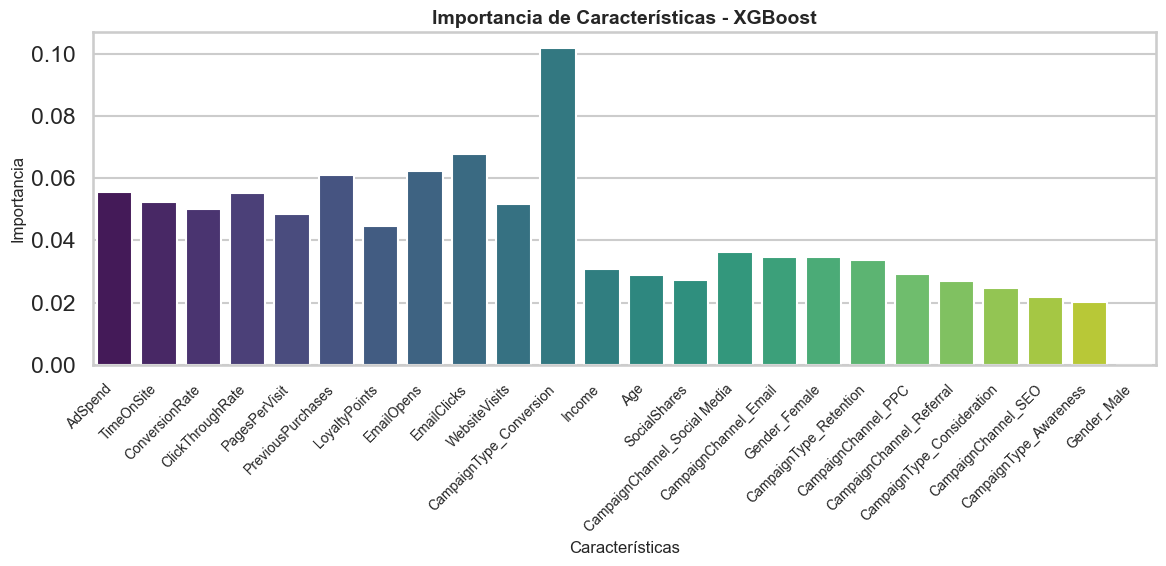

Tabla de Importancias:
                              RandomForest  GradientBoosting   XGBoost  \
AdSpend                           0.083679      1.274742e-01  0.055600   
TimeOnSite                        0.087030      1.137714e-01  0.052257   
ConversionRate                    0.085287      1.066993e-01  0.050030   
ClickThroughRate                  0.084508      9.995577e-02  0.055226   
PagesPerVisit                     0.084894      1.044235e-01  0.048621   
PreviousPurchases                 0.057507      9.621865e-02  0.061082   
LoyaltyPoints                     0.079578      8.458579e-02  0.044560   
EmailOpens                        0.063134      8.310349e-02  0.062417   
EmailClicks                       0.055275      6.786491e-02  0.067645   
WebsiteVisits                     0.070845      5.993758e-02  0.051717   
CampaignType_Conversion           0.013449      4.231524e-02  0.101807   
Income                            0.057237      8.944193e-03  0.030890   
Age            

In [90]:
# Variables predictoras y objetivo
X = df_encoded.drop(columns=['Conversion', 'CustomerID'])
y = df_encoded['Conversion']

# Modelos a usar
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Entrenar cada modelo y calcular importancia de características
importances_dict = {}
for model_name, model in models.items():
    model.fit(X, y)
    importances_dict[model_name] = model.feature_importances_

# Crear un DataFrame con las importancias
importances_df = pd.DataFrame(importances_dict, index=X.columns)

# Calcular la media de importancias
importances_df['Mean_Importance'] = importances_df.mean(axis=1)

# Ordenar por importancia media
importances_df = importances_df.sort_values(by='Mean_Importance', ascending=False)

# Gráfico combinado de importancias
plt.figure(figsize=(12, 6))

# Graficar las importancias de cada modelo
for model_name in models.keys():
    plt.bar(importances_df.index, importances_df[model_name], alpha=0.6, label=model_name)

# Graficar la media de importancias como una línea
plt.plot(importances_df['Mean_Importance'], color='black', marker='o', linestyle='-', linewidth=2, label='Media')

# Ajustar el gráfico combinado
plt.title('Importancia de Características por Modelo y Promedio', fontsize=14, fontweight='bold')
plt.xlabel('Características', fontsize=12)
plt.ylabel('Importancia', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# Gráficos individuales por modelo
for model_name in models.keys():
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=importances_df.index,
        y=importances_df[model_name],
        palette="viridis",
    )
    plt.title(f'Importancia de Características - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Características', fontsize=12)
    plt.ylabel('Importancia', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()
    plt.show()

# Mostrar la tabla de importancias
print("Tabla de Importancias:")
print(importances_df)


### **Análisis y Estrategia para Optimización de Campañas**

---

#### **1. Problema Actual**
Las campañas no aprovechan al máximo los datos disponibles de los clientes y su interacción con los canales publicitarios. Esto genera:
- **Falta de personalización:**  
  No se consideran métricas específicas de comportamiento de los clientes como `ClickThroughRate` o `PagesPerVisit`.  
- **Uso generalizado de canales:**  
  Los recursos se distribuyen en todos los canales (`CampaignChannel`) sin priorizar los más efectivos.  
- **Estrategias no dirigidas:**  
  Los diferentes tipos de campaña (`CampaignType`) no están alineados con las necesidades o características del cliente.  

**Impacto:**  
Bajo retorno de inversión (ROI) y pérdida de oportunidades para convertir y retener clientes.

---

#### **2. Solución Propuesta**
Para optimizar las campañas, es fundamental aprovechar las siguientes métricas disponibles:

---

### **Modelo Predictivo para Conversiones**

#### **Variables Clave del Cliente**

Estas variables pueden ayudar a identificar a los usuarios más propensos a convertir:
1. **Métricas de Interacción Digital:**
   - **`ClickThroughRate` (CTR):** Porcentaje de clics en anuncios; refleja el interés inicial del cliente.
   - **`ConversionRate`:** Porcentaje de clientes que realizan una acción tras interactuar con el anuncio.
   - **`WebsiteVisits`:** Número total de visitas al sitio web, un indicador del interés general del usuario.
   - **`PagesPerVisit`:** Promedio de páginas vistas por visita; muestra el nivel de compromiso del cliente.
   - **`TimeOnSite`:** Tiempo promedio que el cliente pasa en el sitio web; refleja la profundidad de la exploración.
   - **`SocialShares`:** Cantidad de veces que el cliente compartió el contenido en redes sociales; mide la viralidad e impacto orgánico.
   
2. **Métricas de Email Marketing:**
   - **`EmailOpens`:** Número de correos abiertos; muestra el interés en campañas de email marketing.
   - **`EmailClicks`:** Número de clics en correos electrónicos; indica el nivel de respuesta a los mensajes promocionales.

3. **Historial y Lealtad del Cliente:**
   - **`PreviousPurchases`:** Número de compras previas realizadas por el cliente; un indicador directo de compromiso con la marca.
   - **`LoyaltyPoints`:** Puntos acumulados en programas de fidelización, reflejan el nivel de lealtad del cliente.

---

#### **Variables de los Canales y Tipos de Campaña**

1. **`AdSpend`:**
   - Representa el gasto en anuncios para cada cliente. Un mayor gasto puede estar asociado con clientes más comprometidos, pero también puede reflejar ineficiencia si no está optimizado.

2. **Canales Publicitarios (`CampaignChannel`):**
   - **`Email`:** Canal eficaz para retención de clientes y promociones personalizadas.
   - **`PPC`:** Ideal para captar clientes que ya están interesados en el producto o servicio.
   - **`Referral`:** Efectivo para expandir la base de clientes a través de recomendaciones.
   - **`SEO`:** Atrae tráfico orgánico; funciona mejor para clientes en la etapa de consideración.
   - **`Social Media`:** Excelente para generar conocimiento de marca y captar a un público joven.

3. **Tipos de Campaña (`CampaignType`):**
   - **`Awareness`:** Crea conocimiento de la marca. Más útil en canales como `Social Media` y `SEO`.
   - **`Consideration`:** Fomenta interés en el producto. Utiliza datos como `TimeOnSite` y `PagesPerVisit` para segmentar.
   - **`Conversion`:** Diseñada para cerrar ventas. Basada en clientes con altas tasas de `ClickThroughRate` y `ConversionRate`.
   - **`Retention`:** Retener clientes existentes con altos `LoyaltyPoints` o `PreviousPurchases`.

---

### **Segmentación Basada en Objetivos**

#### **Segmentos de Clientes:**
1. **Usuarios Altamente Comprometidos:**
   - Características:  
     - Alta interacción (`ClickThroughRate > 0.2`, `TimeOnSite > 10`).
     - Historial de compras frecuentes (`PreviousPurchases > 5`).
   - Objetivo: Maximizar ventas con campañas de `Conversion` y canales como `Email` y `PPC`.

2. **Clientes Potenciales:**
   - Características:  
     - Moderado interés (`ClickThroughRate > 0.1`, `PagesPerVisit > 5`).
     - Visitas recurrentes al sitio (`WebsiteVisits > 10`).
   - Objetivo: Incrementar el compromiso con campañas de `Consideration` a través de `SEO` o `Social Media`.

3. **Usuarios Poco Activos:**
   - Características:  
     - Baja interacción (`ClickThroughRate < 0.1`, `TimeOnSite < 5`).
     - Pocas visitas al sitio (`WebsiteVisits < 5`).
   - Objetivo: Reengancharlos con campañas de `Awareness` y ofertas personalizadas.

---

#### **Optimización de Canales:**
- **Email:**
   - Segmentar usuarios con altas tasas de `EmailOpens` y `EmailClicks`. Ideal para campañas de `Retention`.
- **Social Media:**
   - Apuntar a usuarios con altas tasas de `SocialShares` para campañas de `Awareness`.
- **PPC:**
   - Focalizar en usuarios con altos ingresos (`Income > Percentil 80`) para maximizar el retorno de inversión.

#### **Optimización de AdSpend:**
- Calcular eficiencia del gasto por conversión:
   ```python
   df['AdSpend_per_Conversion'] = df['AdSpend'] / (df['Conversion'] + 1)  # Evitar división por cero


### **Cálculo de ClickThroughRate (CTR) y ConversionRate**

---

#### **ClickThroughRate (CTR)**
El **`ClickThroughRate (CTR)`** mide el porcentaje de personas que hacen clic en un anuncio en relación con la cantidad de veces que el anuncio se muestra (impresiones). Se calcula como:

CTR = (Número de clics / Número de impresiones) × 100

##### **Fórmulas Relacionadas:**
1. **Clics estimados:**
   Clics = CTR × Impresiones totales

2. **Relación con ConversionRate:**
   Una vez calculados los clics, estos se pueden usar para determinar el `ConversionRate`:
   ConversionRate = (Conversiones / Clics) × 100

---

#### **ConversionRate**
El **`ConversionRate`** mide el porcentaje de clics que resultan en acciones deseadas (e.g., compras, registros). Se calcula como:

ConversionRate = (Conversiones / Total de clics) × 100

##### **Fórmulas Relacionadas:**
1. **Clics estimados:**
   Clics = ClickThroughRate × Impresiones totales

2. **Conversiones estimadas:**
   ConversionRate = Conversiones / Clics

---

### **Limitaciones para Confirmar los Cálculos**
1. **Número de impresiones:**  
   Este dato no está presente en el dataset, lo que impide calcular directamente los clics reales desde el CTR.
2. **Número de conversiones reales:**  
   Aunque la descripción indica que el `ConversionRate` está vinculado a las acciones deseadas logradas, no hay detalles sobre las conversiones exactas por usuario o campaña.

---

### **Conclusión**
- **CTR** mide la efectividad inicial del anuncio en generar clics.
- **ConversionRate** mide la efectividad de los clics en generar acciones deseadas.
- Sin el número de impresiones y conversiones específicas, no es posible calcular estas métricas desde cero.
- Ambos valores (`CTR` y `ConversionRate`) ya procesados en el dataset son métricas clave para modelos de Machine Learning y análisis predictivo.


In [91]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

# Calcular class_weight para modelos que lo admitan
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Modelos y parámetros
models = {
    "RandomForest": RandomForestClassifier(class_weight=class_weights_dict, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=class_weights_dict[1] / class_weights_dict[0], random_state=42),
}

param_grids = {
    "RandomForest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [10, 20, None],
        "classifier__min_samples_split": [2, 5],
        "classifier__min_samples_leaf": [1, 4],
    },
    "GradientBoosting": {
        "classifier__n_estimators": [50, 100],
        "classifier__learning_rate": [0.01, 0.1],
        "classifier__max_depth": [3, 5],
        "classifier__subsample": [0.6, 0.8, 1.0],
    },
    "XGBoost": {
        "classifier__n_estimators": [50, 100],
        "classifier__learning_rate": [0.01, 0.1],
        "classifier__max_depth": [3, 5],
        "classifier__subsample": [0.6, 0.8],
    },
}

# Almacenar resultados
all_results = []

# Crear pipelines y ajustar modelos
for model_name, model in models.items():
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),  # Escalado
            ("classifier", model),  # Modelo
        ]
    )

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        scoring="recall",
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
    )

    grid_search.fit(X_train_balanced, y_train_balanced)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Resultados
    recall_train = recall_score(y_train_balanced, best_model.predict(X_train_balanced))
    recall_test = recall_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Guardar modelo
    joblib.dump(best_model, f"{model_name}_best_model.pkl")

    # Guardar resultados
    all_results.append(
        {
            "Model": model_name,
            "Recall (Train)": recall_train,
            "Recall (Test)": recall_test,
            "Precision (Test)": precision_test,
            "F1-Score (Test)": f1_test,
            "ROC-AUC (Test)": roc_auc_test,
            "Confusion Matrix": cm,
        }
    )

# Stacking Classifier
estimators = [(name, joblib.load(f"{name}_best_model.pkl").named_steps["classifier"]) for name in models.keys()]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))
stacking_clf.fit(X_train_balanced, y_train_balanced)

y_pred_stack = stacking_clf.predict(X_test)
y_pred_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]
recall_train_stack = recall_score(y_train_balanced, stacking_clf.predict(X_train_balanced))
recall_test_stack = recall_score(y_test, y_pred_stack)
precision_test_stack = precision_score(y_test, y_pred_stack)
f1_test_stack = f1_score(y_test, y_pred_stack)
roc_auc_test_stack = roc_auc_score(y_test, y_pred_proba_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)

# Guardar resultados Stacking
all_results.append(
    {
        "Model": "StackingClassifier",
        "Recall (Train)": recall_train_stack,
        "Recall (Test)": recall_test_stack,
        "Precision (Test)": precision_test_stack,
        "F1-Score (Test)": f1_test_stack,
        "ROC-AUC (Test)": roc_auc_test_stack,
        "Confusion Matrix": cm_stack,
    }
)
joblib.dump(stacking_clf, "StackingClassifier_best_model.pkl")

# Mostrar resultados
df_results = pd.DataFrame(all_results)
print("\nResultados finales:")
print(df_results)

# Mostrar matrices de confusión
for result in all_results:
    print(f"\nMatriz de Confusión para {result['Model']}:\n{result['Confusion Matrix']}")



Resultados finales:
                Model  Recall (Train)  Recall (Test)  Precision (Test)  \
0        RandomForest        1.000000       0.977889          0.887953   
1    GradientBoosting        0.992460       0.987161          0.912929   
2             XGBoost        0.810556       0.760342          0.952636   
3  StackingClassifier        0.997738       0.969330          0.894668   

   F1-Score (Test)  ROC-AUC (Test)          Confusion Matrix  
0         0.930754        0.739404   [[25, 173], [31, 1371]]  
1         0.948595        0.798416   [[66, 132], [18, 1384]]  
2         0.845696        0.790609  [[145, 53], [336, 1066]]  
3         0.930503        0.642491   [[38, 160], [43, 1359]]  

Matriz de Confusión para RandomForest:
[[  25  173]
 [  31 1371]]

Matriz de Confusión para GradientBoosting:
[[  66  132]
 [  18 1384]]

Matriz de Confusión para XGBoost:
[[ 145   53]
 [ 336 1066]]

Matriz de Confusión para StackingClassifier:
[[  38  160]
 [  43 1359]]


In [92]:
# Número de registros originales en el conjunto de entrenamiento
original_train_size = len(X_train)

# Número de registros después de aplicar SMOTE + Tomek Links
balanced_train_size = len(X_train_balanced)

# Mostrar resultados
print(f"Registros originales en el conjunto de entrenamiento: {original_train_size}")
print(f"Registros después de SMOTE + Tomek Links (balanceados): {balanced_train_size}")
print(f"Registros totales utilizados en el entrenamiento: {balanced_train_size}")


Registros originales en el conjunto de entrenamiento: 6400
Registros después de SMOTE + Tomek Links (balanceados): 10610
Registros totales utilizados en el entrenamiento: 10610


# Evaluación del Desempeño de los Modelos

A continuación, se presenta un análisis detallado del desempeño de los modelos:

---

## **1. RandomForest**
- **Ventajas:**
  - Excelente desempeño en el entrenamiento (**Recall Train = 1.0**), indicando que captura bien la distribución de los datos.
  - Buen Recall en el conjunto de prueba (**0.9779**), lo que sugiere que identifica correctamente la mayoría de las conversiones.
- **Desventajas:**
  - La matriz de confusión muestra una cantidad significativa de falsos negativos (**173**). Esto podría ser problemático si el enfoque es minimizar errores en la clase minoritaria.
  - **ROC-AUC bajo (0.7394)**, lo que indica que el modelo tiene problemas en clasificaciones más allá del umbral fijo.

---

## **2. GradientBoosting**
- **Ventajas:**
  - Mejor equilibrio entre Recall y Precision en el conjunto de prueba (**F1-Score Test = 0.9486**).
  - Mejor **ROC-AUC (0.7984)** entre los modelos, lo que indica un buen desempeño global a distintos umbrales de clasificación.
  - Matriz de confusión con pocos falsos negativos (**18**), lo que sugiere que este modelo es confiable para identificar conversiones.
- **Desventajas:**
  - Menor capacidad para generalizar (**Recall Train = 0.9925 frente a Test = 0.9872**), aunque la diferencia es pequeña.

---

## **3. XGBoost**
- **Ventajas:**
  - Alta precisión en el conjunto de prueba (**Precision Test = 0.9526**), lo que significa que los valores positivos predichos son confiables.
  - **ROC-AUC decente (0.7906)**, indicando que es robusto en distintas condiciones de clasificación.
- **Desventajas:**
  - Recall bajo en el conjunto de prueba (**0.7603**), lo que indica que pierde muchas conversiones reales.
  - Matriz de confusión muestra **336 falsos negativos**, lo que puede ser inaceptable en un entorno donde la clase positiva es prioritaria.

---

## **4. StackingClassifier**
- **Ventajas:**
  - Combina las fortalezas de los otros modelos, logrando un buen balance entre Recall (**Test = 0.9693**) y Precision (**Test = 0.8947**).
  - Buen **F1-Score (0.9305)**, lo que indica un balance general entre Precision y Recall.
  - Matriz de confusión con **43 falsos negativos**, un desempeño intermedio entre GradientBoosting y RandomForest.
- **Desventajas:**
  - **ROC-AUC relativamente bajo (0.6425)**, lo que sugiere problemas en la clasificación más allá del umbral fijo.

---

## **Conclusión**
1. **GradientBoosting** es el mejor modelo en términos de Recall, Precision y ROC-AUC. Su bajo número de falsos negativos lo hace ideal si la clase positiva (conversiones) es crítica.
2. **RandomForest** tiene un buen desempeño general, pero podría mejorar en Precision y ROC-AUC.
3. **XGBoost** se destaca en Precision pero tiene un Recall bajo, lo que lo hace menos adecuado si el objetivo es minimizar falsos negativos.
4. **StackingClassifier** es un buen compromiso entre todos los modelos, pero su bajo ROC-AUC puede ser un problema en ciertas aplicaciones.

---

## **Recomendaciones**
1. **Si el foco está en maximizar el Recall:** Usar **GradientBoosting**.
2. **Si se requiere un balance entre Precision y Recall:** Usar **StackingClassifier**.
3. **Si se prefiere una mayor interpretabilidad y simplicidad:** Usar **RandomForest**.


# ¿Por qué usar Recall y no otras métricas?

El uso del **Recall** como métrica principal depende del objetivo del problema y de las consecuencias asociadas a los errores de clasificación. En este caso, el Recall es relevante porque:

---

## **1. Contexto del Problema**
El objetivo parece ser maximizar las **conversiones** predichas correctamente (minimizar los **falsos negativos**). Esto es importante porque:

- **Conversión (clase positiva):** Representa clientes que realizan una acción deseada (e.g., compra, registro).
- Perder una conversión real (**falso negativo**) puede significar una pérdida de oportunidad de ingresos o de impacto comercial.

---

## **2. Definición de Recall**
El Recall mide qué proporción de los casos positivos reales fueron identificados correctamente:

\[
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\]

- **Alto Recall:** Significa que estamos capturando la mayoría de las conversiones reales.
- **Bajo Recall:** Indica que estamos perdiendo muchas conversiones reales, lo cual puede ser inaceptable si estas son críticas para el negocio.

---

## **3. Comparación con otras métricas**

### **Precision**
- **Qué mide:** La proporción de predicciones positivas que son correctas.
- **Útil cuando:** Es más importante evitar falsos positivos que identificar todos los positivos.
- **Por qué no usarlo aquí:** No es la prioridad porque no es tan crítico si identificamos algunas conversiones incorrectas mientras capturamos la mayoría de las reales.

### **Accuracy**
- **Qué mide:** La proporción total de predicciones correctas.
- **Limitación:** Puede ser engañosa en problemas desbalanceados como este, donde la clase negativa es mucho más frecuente. Un modelo que prediga siempre "no conversión" tendría alta Accuracy pero no resolvería el problema.

### **F1-Score**
- **Qué mide:** Es el balance entre Precision y Recall.
- **Útil cuando:** Ambos errores (falsos positivos y falsos negativos) tienen consecuencias significativas.
- **Complemento:** Puede ser útil como métrica adicional, pero en este caso, el Recall tiene más peso.

### **ROC-AUC**
- **Qué mide:** El desempeño global del modelo a través de distintos umbrales.
- **Útil para:** Evaluar el balance global del modelo, pero no mide directamente el éxito en identificar conversiones reales.

---

## **4. Justificación Específica**
Elegir **Recall** es adecuado si:
1. **El impacto de los falsos negativos es alto:** Perder conversiones reales puede ser costoso.
2. **Existe tolerancia a falsos positivos:** Si el costo de un falso positivo (predecir conversión cuando no ocurre) es bajo, podemos priorizar Recall sobre Precision.

---

## **Conclusión**
En este problema, **maximizar Recall asegura que se capturen tantas conversiones reales como sea posible**. Sin embargo, se puede complementar con otras métricas (como F1-Score o ROC-AUC) para garantizar un equilibrio adecuado entre Precision y Recall si también se busca evitar falsos positivos.


hacer segmentacion de clientes con kmeans